#**Building your Second Neural Network with TensorFlow and Keras**

# Things to know:



## Definintion of terms

1. [***Sequential()***](https://keras.io/guides/sequential_model/): A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

2. ***Dense()***: a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

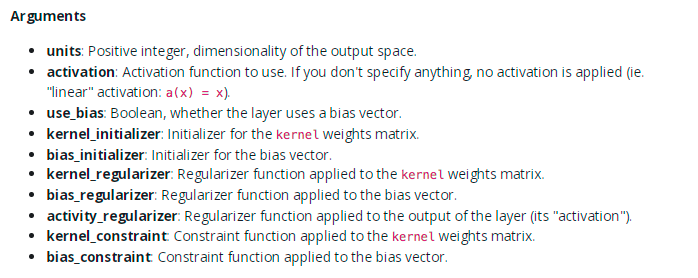

3. ***Compile()***: putting all our recipes together and making it ready for training in the next phase.

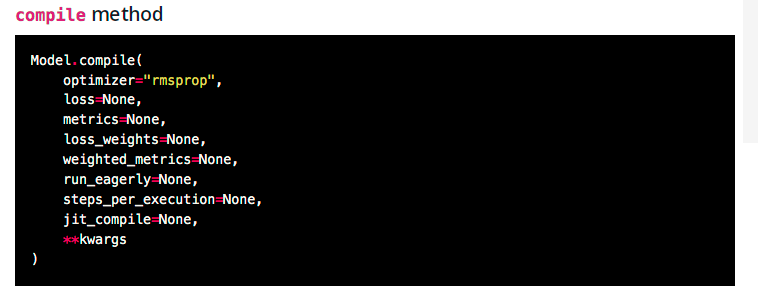

Definition of these arguments for the *compile()* method [can be found here](https://keras.io/api/models/model_training_apis/)

3. ***fit()***: Trains the model for a fixed number of epochs (iterations on a dataset).

    1. **Epoch:** One pass through all of the rows in the training dataset.
    2. **Batch:** One or more samples considered by the model within an epoch before weights are updated.


Definition of these arguments for the *fit()* method [can be found here](https://keras.io/api/models/model_training_apis/)

## What Is a Sample?
A sample is a single row of data.

It contains inputs that are fed into the algorithm and an output that is used to compare to the prediction and calculate an error.

A training dataset is comprised of many rows of data, e.g. many samples. A sample may also be called an instance, an observation, an input vector, or a feature vector.

Now that we know what a sample is, let’s define a batch.

## What Is a Batch?
The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.

A training dataset can be divided into one or more batches.

When all training samples are used to create one batch, the learning algorithm is called batch gradient descent. When the batch is the size of one sample, the learning algorithm is called stochastic gradient descent. When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.

1. ***Batch Gradient Descent.***: Batch Size = Size of Training Set
2. ***Stochastic Gradient Descent**: Batch Size = 1
3. Mini-Batch Gradient Descent***: 1 < Batch Size < Size of Training Set



In the case of mini-batch gradient descent, popular batch sizes include 32, 64, and 128 samples. You may see these values used in models in the literature and in tutorials.



###What Is an Epoch?
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

The number of epochs is traditionally large, often hundreds or thousands, allowing the learning algorithm to run until the error from the model has been sufficiently minimized. You may see examples of the number of epochs in the literature and in tutorials set to 10, 100, 500, 1000, and larger.

## What Is the Difference Between Batch and Epoch?
The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.

They are both integer values and they are both hyperparameters for the learning algorithm, e.g. parameters for the learning process, not internal model parameters found by the learning process.

You must specify the batch size and number of epochs for a learning algorithm.

There are no magic rules for how to configure these parameters. You must try different values and see what works best for your problem.

##Worked Example
Finally, let’s make this concrete with a small example.

Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

Note the following steps in creating your neural network:

1. Define our training data
2. Create a sequential model:
3. Add layers
4. Compile our model
5. Fit our model to our training data
6. Predict values


# Predicting Wine Types: Red or White?

#1. Load Data

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential # for creating sequential models
from keras.layers import Dense #for creating dense laye

[Download dataset](https://drive.google.com/file/d/1DdUcghdAuQavpNBLSPPW1FJl9iYuJS-V/view?usp=sharing)

In [ ]:
# Import pandas
import pandas as pd

# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [ ]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1. **Fixed acidity:** acids are major wine properties and contribute greatly to the wine’s taste. Usually, the total acidity is divided into two groups: the volatile acids and the nonvolatile or fixed acids. Among the fixed acids that you can find in wines are the following: tartaric, malic, citric, and succinic. This variable is expressed in g(tartaricacid)/dm3 in the data sets.
2. **Volatile acidity:** the volatile acidity is basically the process of wine turning into vinegar. In the U.S, the legal limits of Volatile Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. In these data sets, the volatile acidity is expressed in g(aceticacid)/dm3.
3. **Citric acid** is one of the fixed acids that you’ll find in wines. It’s expressed in g/dm3 in the two data sets.
4. **Residual sugar** typically refers to the sugar remaining after fermentation stops, or is stopped. It’s expressed in g/dm3 in the red and white data.
5. **Chlorides** can be a significant contributor to saltiness in wine. Here, you’ll see that it’s expressed in g(sodiumchloride)/dm3.
6. **Free sulfur dioxide:** the part of the sulfur dioxide that is added to a wine and that is lost into it is said to be bound, while the active part is said to be free. The winemaker will always try to get the highest proportion of free sulfur to bind. This variable is expressed in mg/dm3 in the data.
7. **Total sulfur dioxide** is the sum of the bound and the free sulfur dioxide (SO2). Here, it’s expressed in mg/dm3. There are legal limits for sulfur levels in wines: in the EU, red wines can only have 160mg/L, while white and rose wines can have about 210mg/L. Sweet wines are allowed to have 400mg/L. For the US, the legal limits are set at 350mg/L, and for Australia, this is 250mg/L.
8. **Density** is generally used as a measure of the conversion of sugar to alcohol. Here, it’s expressed in g/cm3.
9. **pH** or the potential of hydrogen is a numeric scale to specify the acidity or basicity the wine. As you might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.
10.**Sulfates** are to wine as gluten is to food. You might already know sulfites from the headaches that they can cause. They are a regular part of the winemaking around the world and are considered necessary. In this case, they are expressed in g(potassiumsulphate)/dm3.
11. **Alcohol:** wine is an alcoholic beverage, and as you know, the percentage of alcohol can vary from wine to wine. It shouldn’t be surprised that this variable is included in the data sets, where it’s expressed in % vol.
12. **Quality:** wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual number is the median of at least three evaluations made by those same wine experts.

## Visualizing The Data

### Alcohol

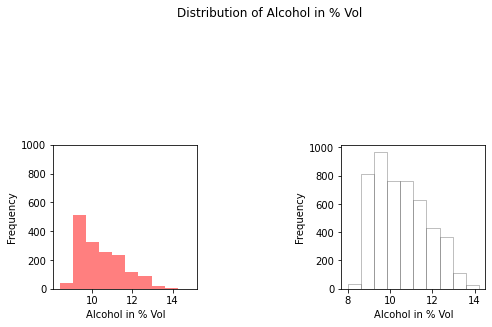

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

As you can see in the image below, you see that the alcohol levels between the red and white wine are mostly the same: they have around 9% of alcohol. Of course, there are also a considerable amount of observations that have 10% or 11% of alcohol percentage.

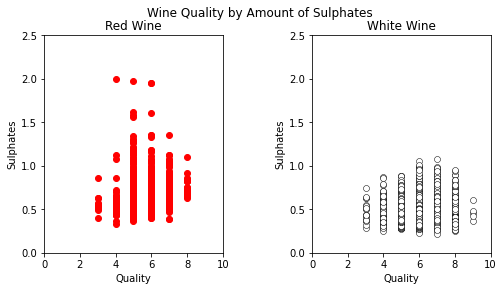

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

In [ ]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [ ]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


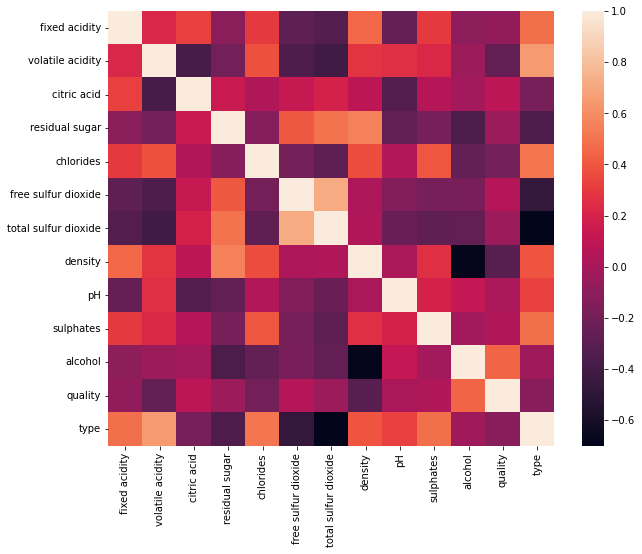

In [ ]:
import seaborn as sns
corr = wines.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Train and Test Sets

In [ ]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np


# Specify the data
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array
y= np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1700,7.1,0.12,0.32,9.60,0.054,64.0,162.0,0.99620,3.40,0.41,9.4
5199,6.8,0.12,0.30,12.90,0.049,32.0,88.0,0.99654,3.20,0.35,9.9
3340,7.7,0.38,0.40,2.00,0.038,28.0,152.0,0.99060,3.18,0.32,12.9
86,8.6,0.49,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9
5587,6.1,0.20,0.17,1.60,0.048,46.0,129.0,0.99100,3.30,0.43,11.4
...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2
5191,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7
5226,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5
5390,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5


## Standardize The Data


In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

## Model Building

In [ ]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(20, activation='relu', input_shape=(11,)))

# Add a hidden layer
model.add(Dense(8, activation='relu'))

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model output shape
# model.output_shape

# Model summary
model.summary()

# Model config
# model.get_config()

# # List all weight tensors
# model.get_weights()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


param_number = output_channel_number * (input_channel_number + 1)

In [ ]:
# 20*(11+1) #No. of parameters in input layer

# 8*(20+1)     #No. of parameters in third dense layer

# 1*(8+1)   #No. of parameters in  dense layer

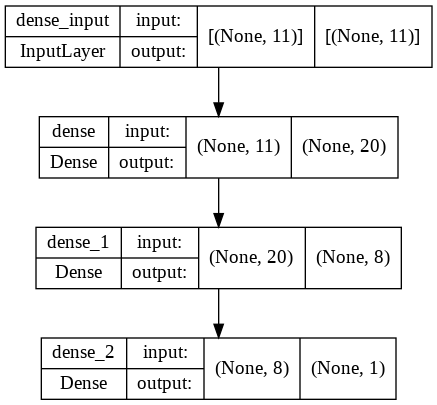

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Compile and Fit

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0778 - accuracy: 0.9754
Epoch 2/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0233 - accuracy: 0.9945
Epoch 3/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0191 - accuracy: 0.9961
Epoch 4/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0169 - accuracy: 0.9966
Epoch 5/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0144 - accuracy: 0.9968
Epoch 6/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0142 - accuracy: 0.9963
Epoch 7/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0117 - accuracy: 0.9975
Epoch 8/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0108 - accuracy: 0.9977
Epoch 9/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0108 - accuracy: 0.9972
Epoch 10/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.009

## Evaluate The Model

In [ ]:
loss, accuuracy =model.evaluate(X_test,y_test)
print('Accuracy: {}\n Loss: {}'.format(accuuracy*100,loss))

68/68 [==============================] - 1s 4ms/step - loss: 0.0249 - accuracy: 0.9953
Accuracy: 99.53380227088928
 Loss: 0.024901913478970528


## Make Predictions

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype(int)
# summarize the first 20 cases
for i in range(20):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[-0.1532054855355864, -1.0276389112402693, 2.9070926363917127, 1.5294330330789816, -0.31384517173640913, -0.37090909658818166, 0.18846135298685626, -0.15739993539823416, 0.2655029264382553, -1.0238764802109783, 1.4382492445467692] => 0 (expected 0)
[0.39305527187968825, 1.880057498508377, -0.7602979451042937, -0.6804700455678852, 0.6419660160850414, 0.08731956784820868, 0.31391830854902636, 0.3063373204434213, 0.3280892516391707, -0.5425504136222827, -0.4885191498751431] => 1 (expected 1)
[-0.3092799876542364, 0.33341047204633106, 0.13925068809284016, 0.40363335150416274, -1.0605726622219172, 0.4309910661755015, 0.31391830854902636, -0.8463810012200792, -0.23518767516905403, -0.6113112802778107, 1.2707041667709513] => 0 (expected 0)
[-0.699466242950861, -0.347114219596969, 1.0387993212899735, 1.1958627570568128, -0.4631906698335107, 1.7483984764301237, 1.2100394197073843, 0.4123344074929331, -0.6107056263745381, -0.1299852136891151, -0.8236093054267805] => 0 (expected 0)
[0.15894351870

In [ ]:
loss, accuuracy =model.evaluate(X_train,y_train)
print('Accuracy: {}\n Loss: {}'.format(accuuracy*100,loss))

136/136 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9989
Accuracy: 99.88511204719543
 Loss: 0.005391160026192665
